In [26]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [2]:
#Cargamos el csv

events = pd.read_csv('../events.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Visualizamos 

events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Observamos que marca y modelo vienen en la misma columna por lo que podemos splitear en 2 columnas con marca y modelo

events['marca'] = events['model'].str.split(' ').str[0]
events['modelo'] = events['model'].str.split(' ').str[1].fillna('') + ' ' + events['model'].str.split(' ').str[2].fillna('')
events.head()


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,marca,modelo
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,NaN,
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,5s
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,5s
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Samsung,Galaxy S8


Text(0,0.5,'Cantidad Registros')

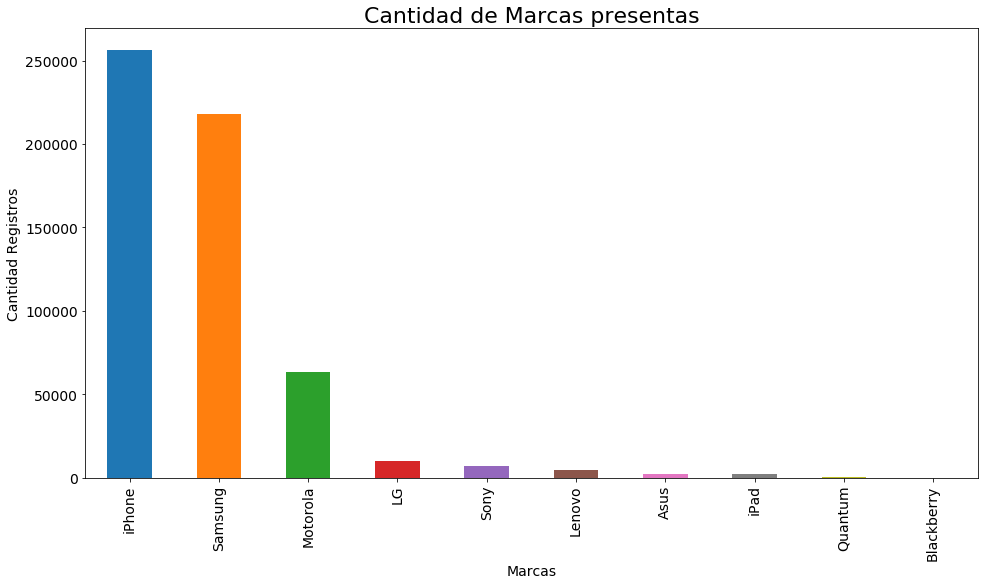

In [37]:
#Mejorar la visualizacion, marca mas presente en el dataframe

df_marca = events.groupby('marca')['timestamp'].count().sort_values(ascending=False)
ax = df_marca.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de Marcas presentas", fontsize=22)
ax.set_xlabel("Marcas",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

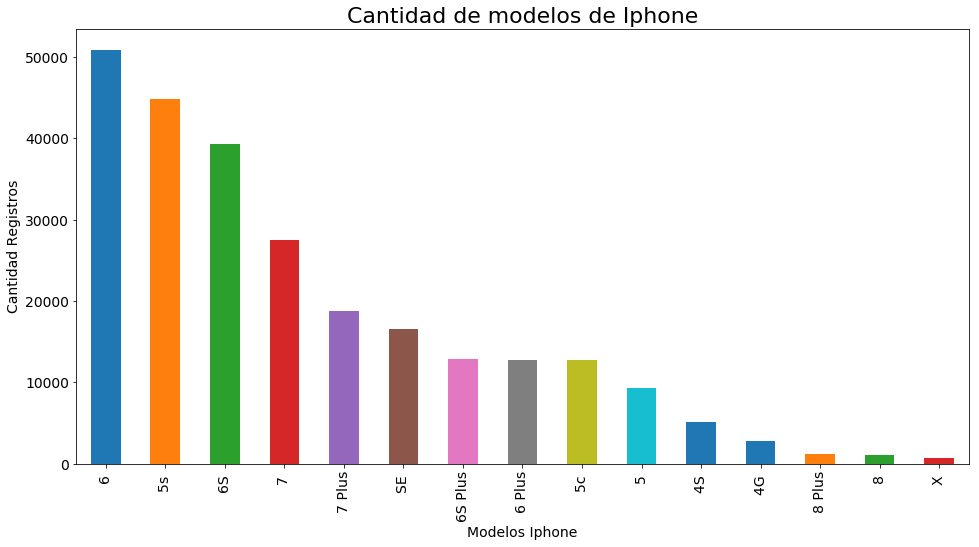

In [6]:
#Modelos mas buscados por Iphone

df_iphone = events.loc[events.marca == "iPhone",] 

df_modelo = df_iphone.groupby('modelo')['timestamp'].count().sort_values(ascending=False)
ax = df_modelo.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de modelos de Iphone", fontsize=22)
ax.set_xlabel("Modelos Iphone",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

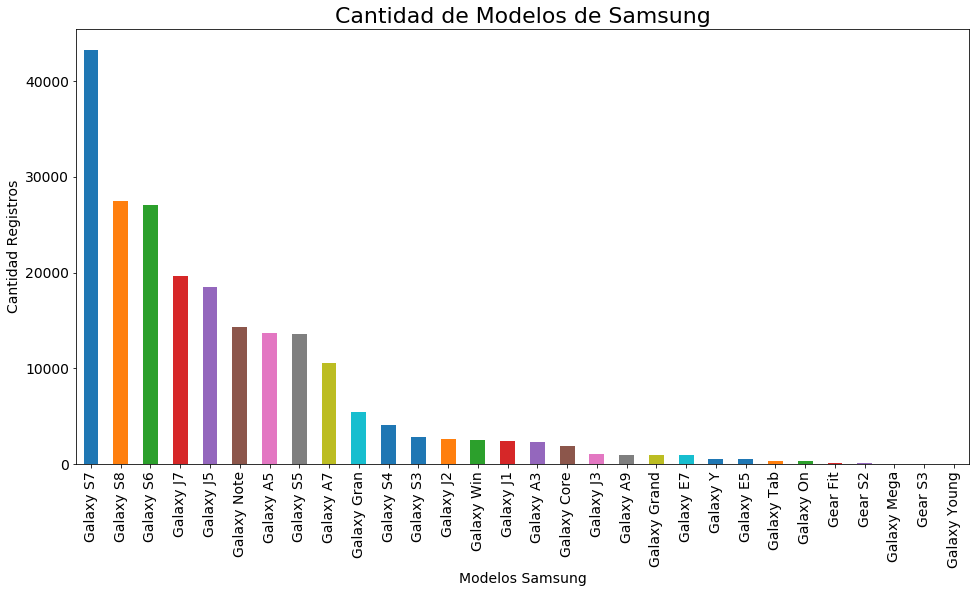

In [119]:
#Modelos mas buscados por Samsung

df_marca = events.loc[events.marca == "Samsung",] 

df_modelo = df_marca.groupby('modelo')['timestamp'].count().sort_values(ascending=False)
ax = df_modelo.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de Modelos de Samsung", fontsize=22)
ax.set_xlabel("Modelos Samsung",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

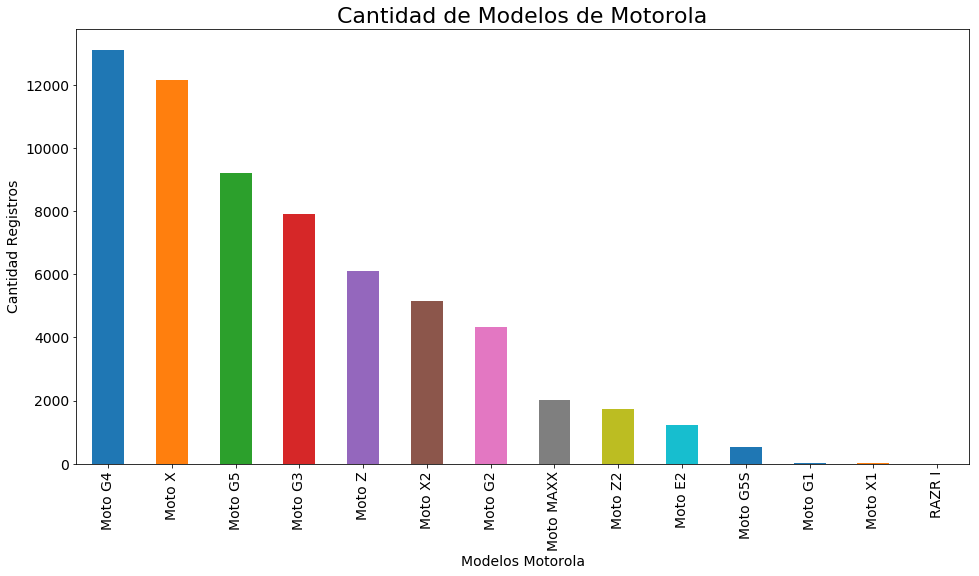

In [120]:
#Modelos mas buscados por Motorla


df_marca = events.loc[events.marca == "Motorola",] 

df_modelo = df_marca.groupby('modelo')['timestamp'].count().sort_values(ascending=False)
ax = df_modelo.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de Modelos de Motorola", fontsize=22)
ax.set_xlabel("Modelos Motorola",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

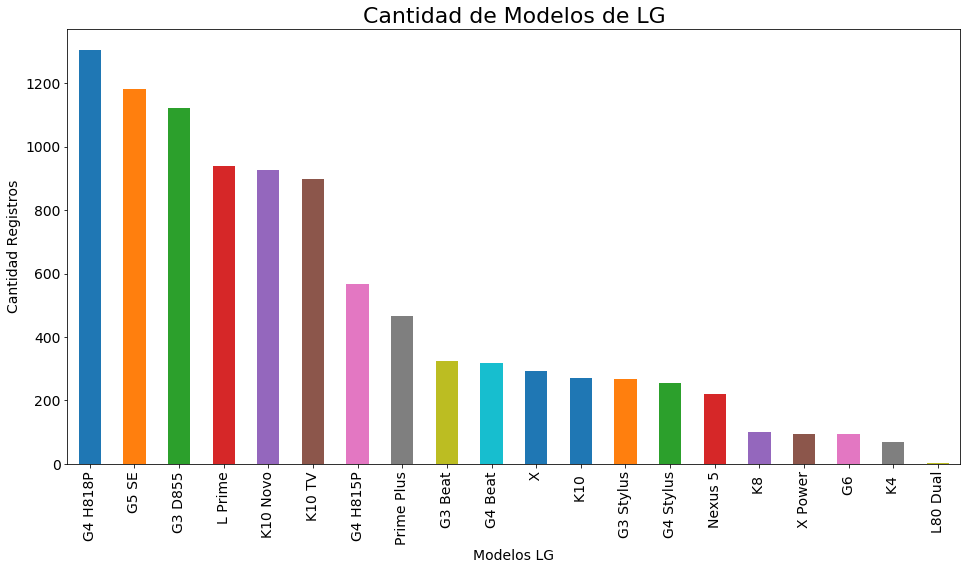

In [121]:
#Modelos mas buscados por LG


df_marca = events.loc[events.marca == "LG",] 

df_modelo = df_marca.groupby('modelo')['timestamp'].count().sort_values(ascending=False)
ax = df_modelo.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de Modelos de LG", fontsize=22)
ax.set_xlabel("Modelos LG",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

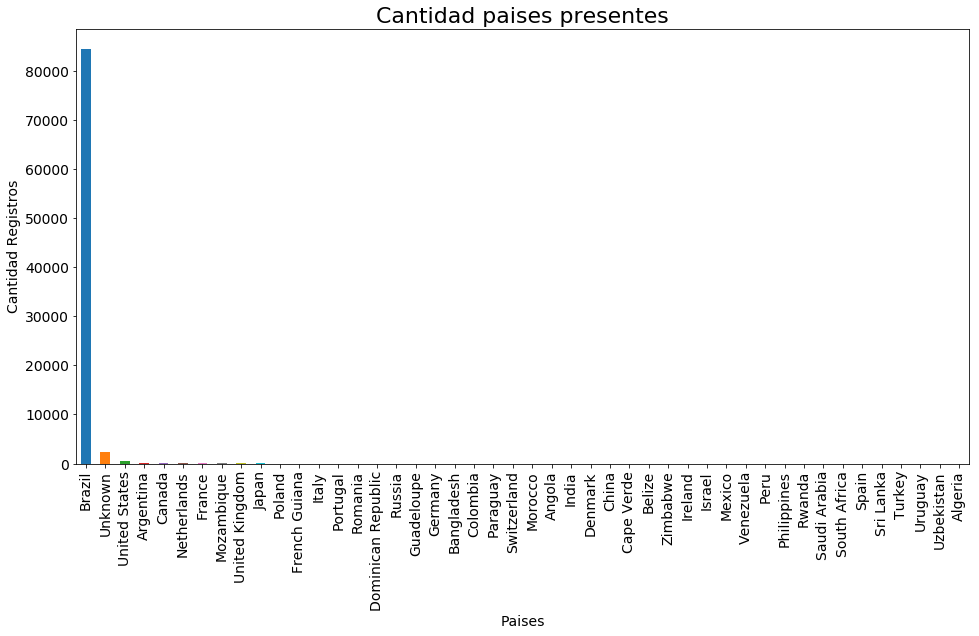

In [122]:
#Agrupamos por pais

df_marca = events.groupby('country')['timestamp'].count().sort_values(ascending=False)
ax = df_marca.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad paises presentes", fontsize=22)
ax.set_xlabel("Paises",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

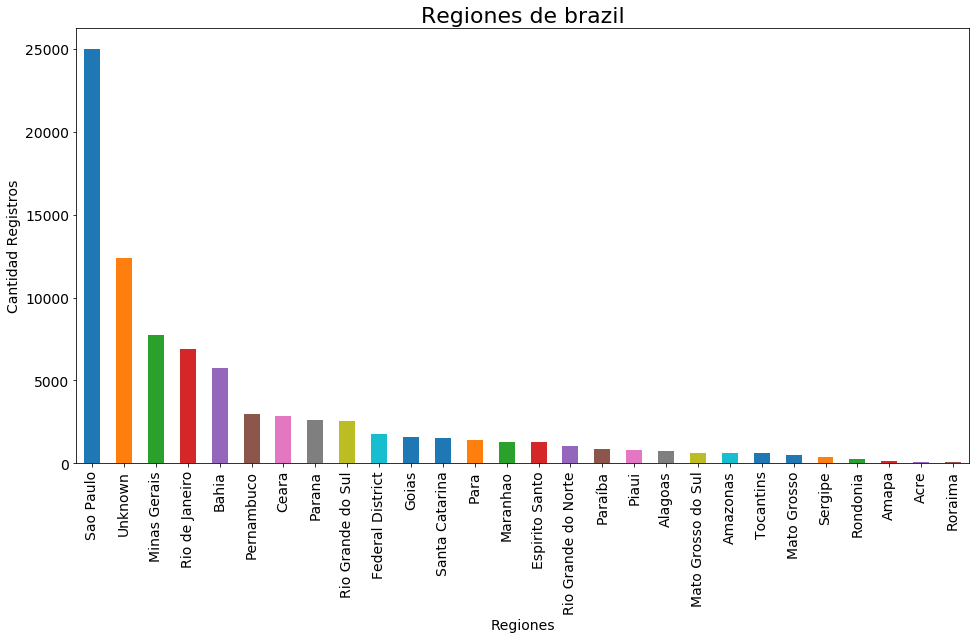

In [123]:
#Agrupamos por region en brazil

df_brazil = events.loc[events.country == "Brazil",]
df_marca = df_brazil.groupby('region')['timestamp'].count().sort_values(ascending=False)
ax = df_marca.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Regiones de brazil", fontsize=22)
ax.set_xlabel("Regiones",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

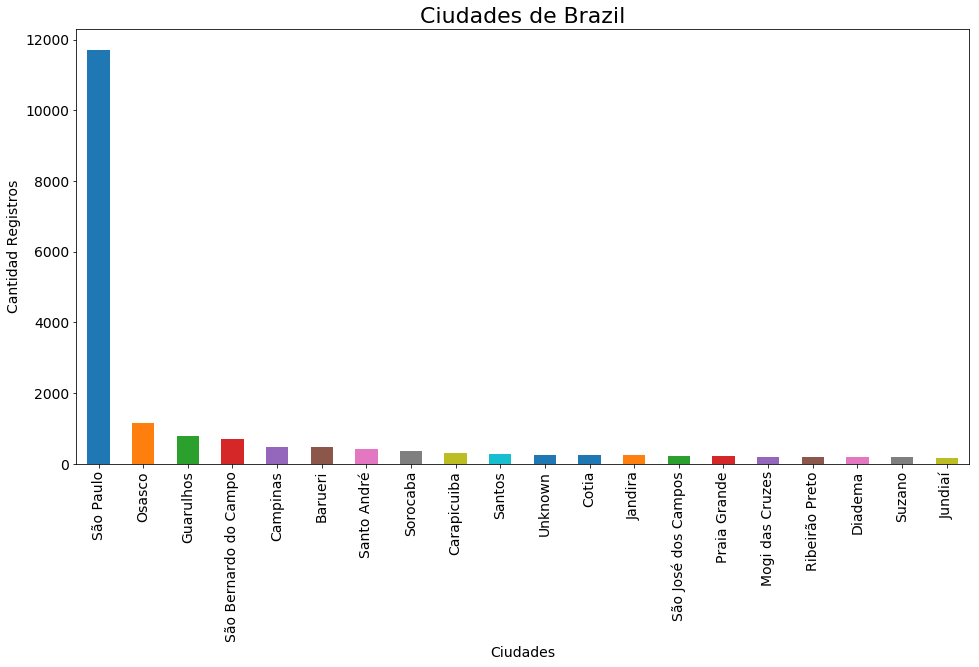

In [124]:
#Agrupamos por ciudad de sao paolo en brazil

df_brazil = events.loc[events.country == "Brazil",]
df_sao_paolo = df_brazil.loc[df_brazil.region.str.contains("Sao Paulo"),]
df_city = df_sao_paolo .groupby('city')['timestamp'].count().sort_values(ascending=False)[0:20]
ax = df_city.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Ciudades de Brazil", fontsize=22)
ax.set_xlabel("Ciudades",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

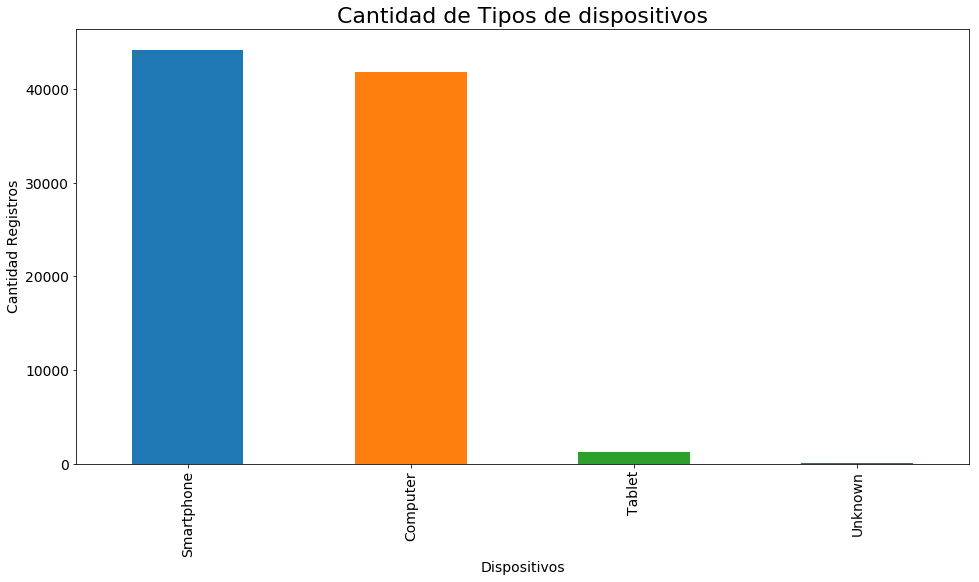

In [125]:
#Agrupacion por tipo de dispositivo

df_marca = events.groupby('device_type')['timestamp'].count().sort_values(ascending=False)
ax = df_marca.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de Tipos de dispositivos", fontsize=22)
ax.set_xlabel("Dispositivos",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Cantidad Registros')

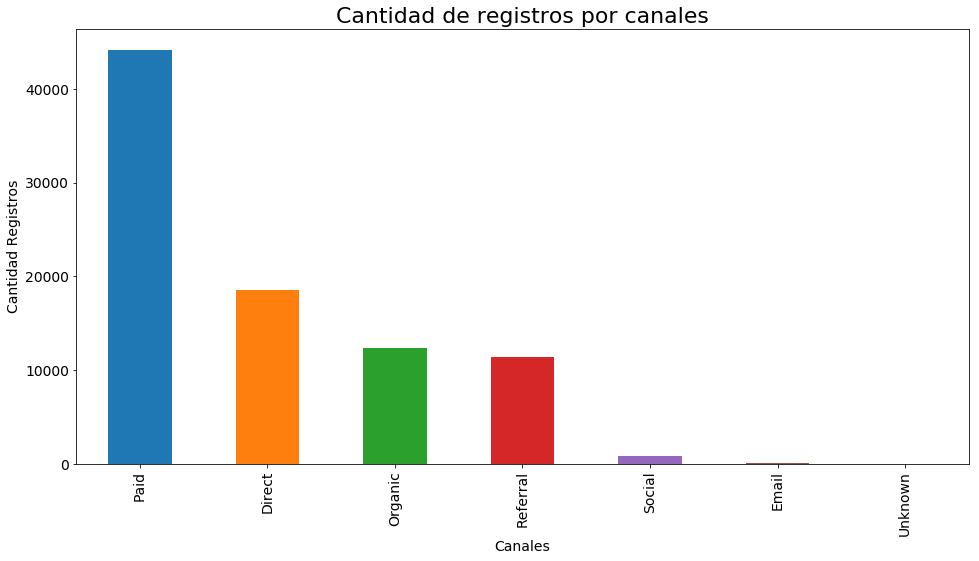

In [126]:
#Agrupacion por canales

df_marca = events.groupby('channel')['timestamp'].count().sort_values(ascending=False)
ax = df_marca.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de registros por canales", fontsize=22)
ax.set_xlabel("Canales",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

array([nan, 'Paid', 'Organic', 'Direct', 'Social', 'Referral', 'Email',
       'Unknown'], dtype=object)

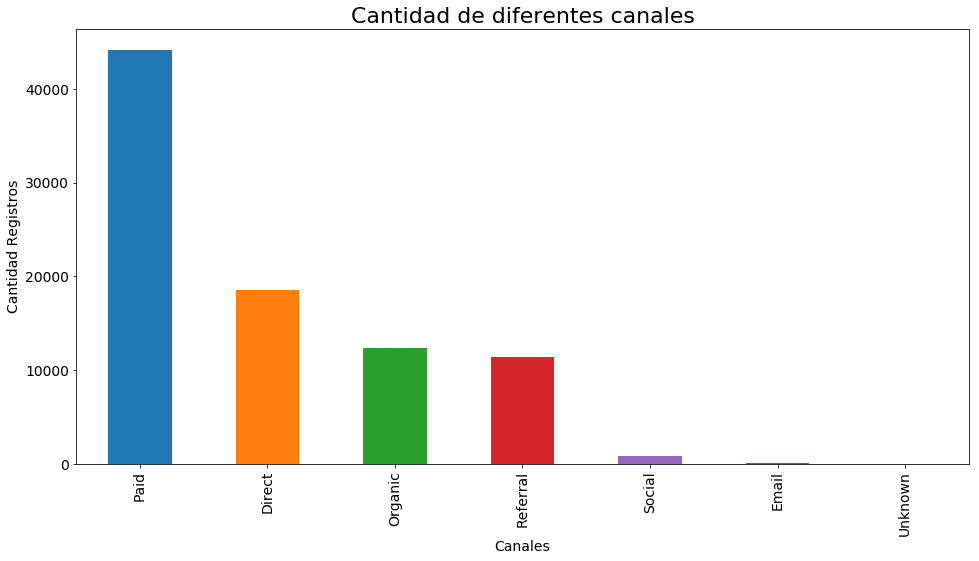

In [7]:
#Agrupamos por los diferentes tipos de canales que llega la gente, para ver que tenemos en el set de datos

df_marca = events.groupby('channel')['timestamp'].count().sort_values(ascending=False)
ax = df_marca.plot(figsize=(16, 8), fontsize=14, kind='bar')
ax.set_title("Cantidad de diferentes canales", fontsize=22)
ax.set_xlabel("Canales",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)



Text(0,0.5,'Cantidad Registros')

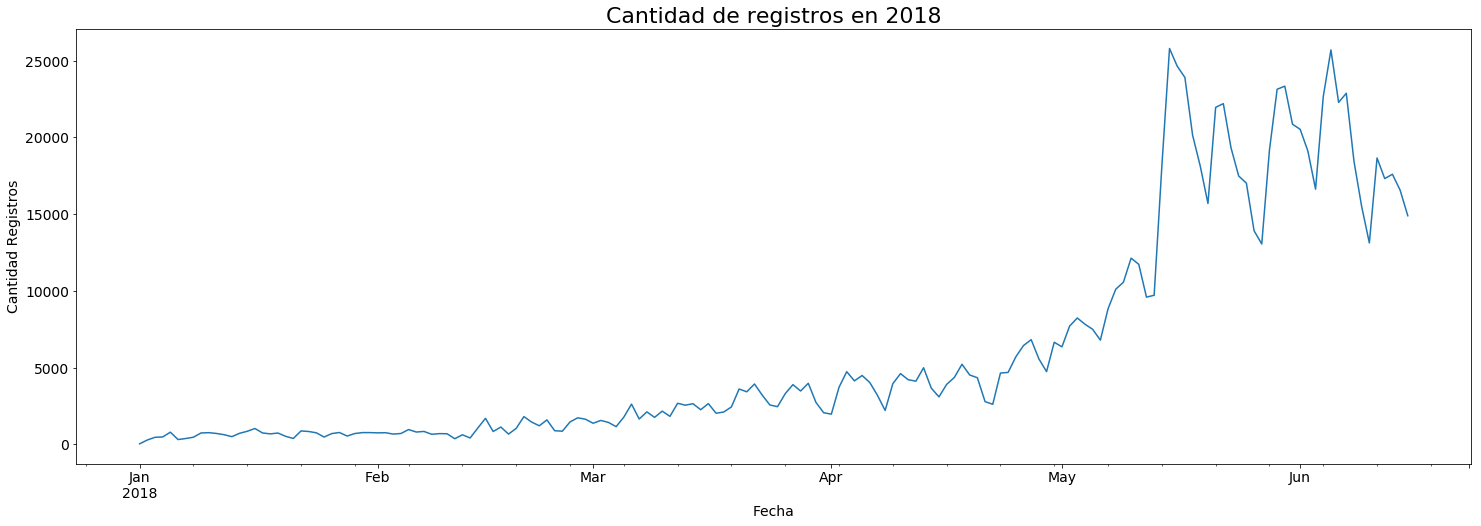

In [67]:
#Analizamos la cantidad de registros generados en el tiempo

events['fecha'] = pd.to_datetime(events['timestamp'])
events['fecha'] = events['fecha'].dt.floor('d')

df_registros = events.groupby('fecha').count()


ax = df_registros['timestamp'].plot(figsize=(25, 8), fontsize=14, kind='line')
ax.set_title("Cantidad de registros en 2018", fontsize=22)
ax.set_xlabel("Fecha",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)


Text(0,0.5,'Cantidad Registros')

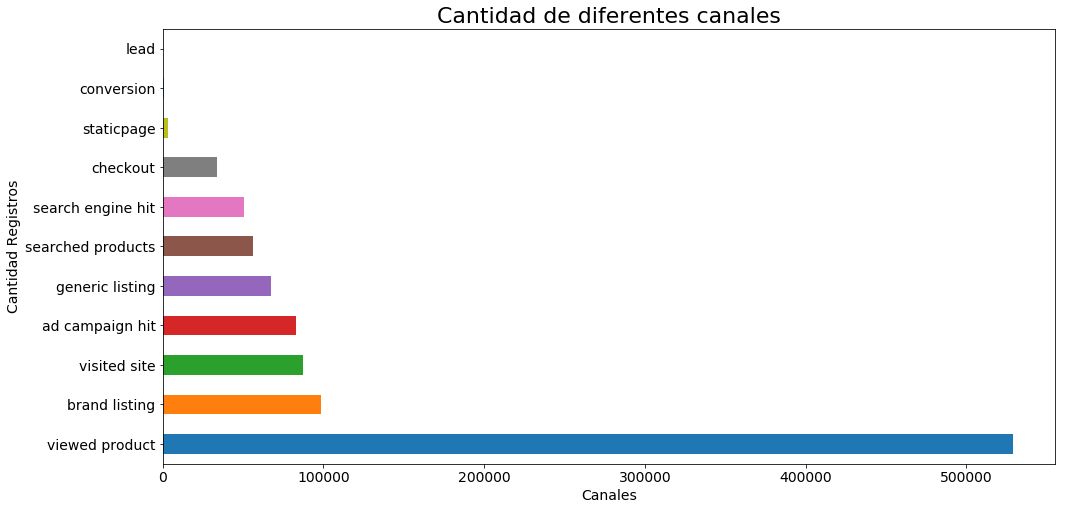

In [71]:
#Analizemos los registros que tenemos de events

df_marca = events.groupby('event')['timestamp'].count().sort_values(ascending=False)
ax = df_marca.plot(figsize=(16, 8), fontsize=14, kind='barh')
ax.set_title("Cantidad de registos de evnetos", fontsize=22)
ax.set_xlabel("eventos",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0,0.5,'Cantidad Registros')

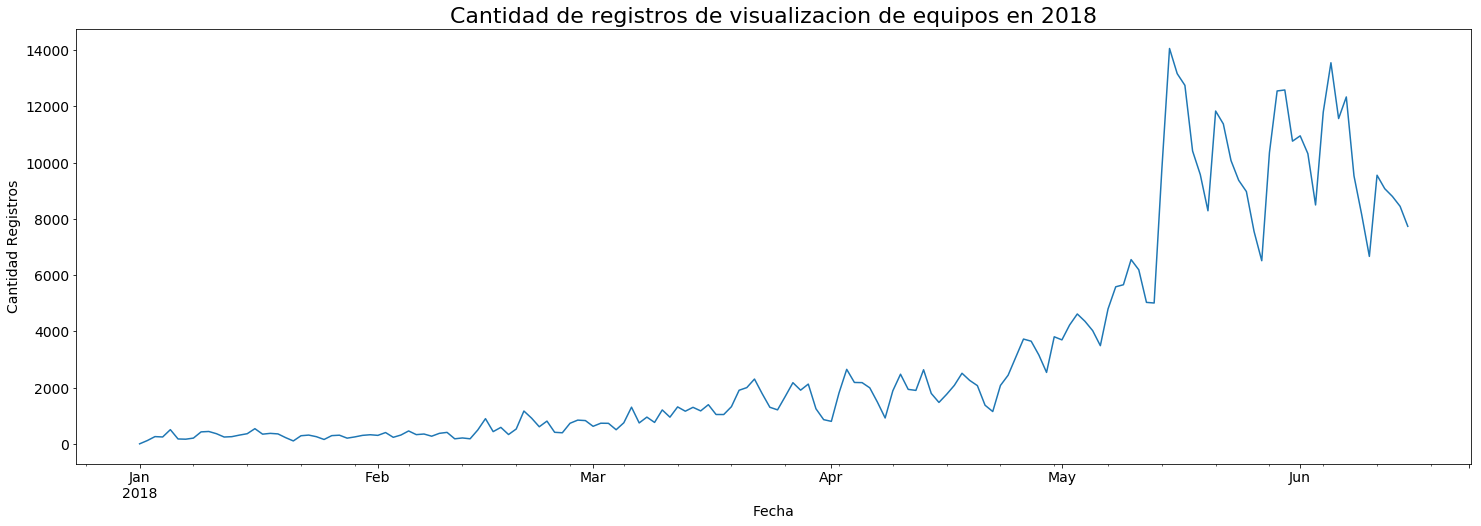

In [81]:
#Analizamos la cantidad de registros generados en el tiempo de visitas


df_viewed = events.loc[events.event == 'viewed product',]

df_viewed['fecha'] = pd.to_datetime(df_viewed['timestamp'])
df_viewed['fecha'] = df_viewed['fecha'].dt.floor('d')


df_registros = df_viewed.groupby('fecha').count()


ax = df_registros['timestamp'].plot(figsize=(25, 8), fontsize=14, kind='line')
ax.set_title("Cantidad de registros de visualizacion de equipos en 2018", fontsize=22)
ax.set_xlabel("Fecha",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0,0.5,'Cantidad Registros')

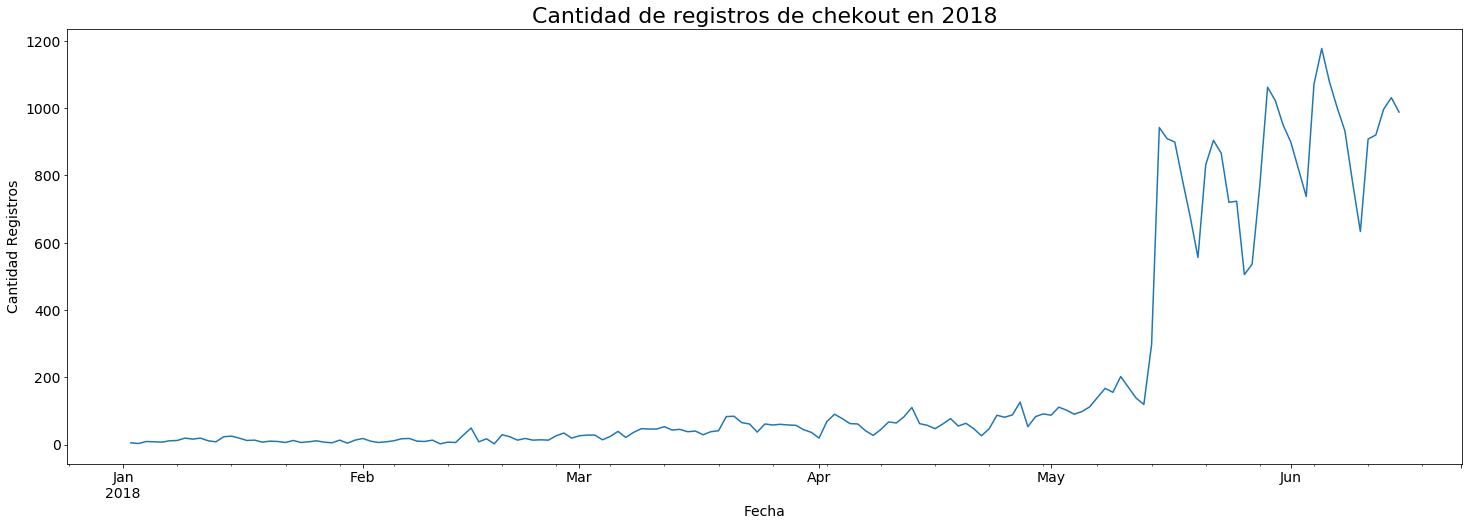

In [82]:
#Analizamos la cantidad de registros generados en el tiempo de dehckout


df_viewed = events.loc[events.event == 'checkout',]

df_viewed['fecha'] = pd.to_datetime(df_viewed['timestamp'])
df_viewed['fecha'] = df_viewed['fecha'].dt.floor('d')


df_registros = df_viewed.groupby('fecha').count()


ax = df_registros['timestamp'].plot(figsize=(25, 8), fontsize=14, kind='line')
ax.set_title("Cantidad de registros de chekout en 2018", fontsize=22)
ax.set_xlabel("Fecha",  fontsize=14)
ax.set_ylabel("Cantidad Registros",fontsize=14)

Text(0,0.5,'Browser')

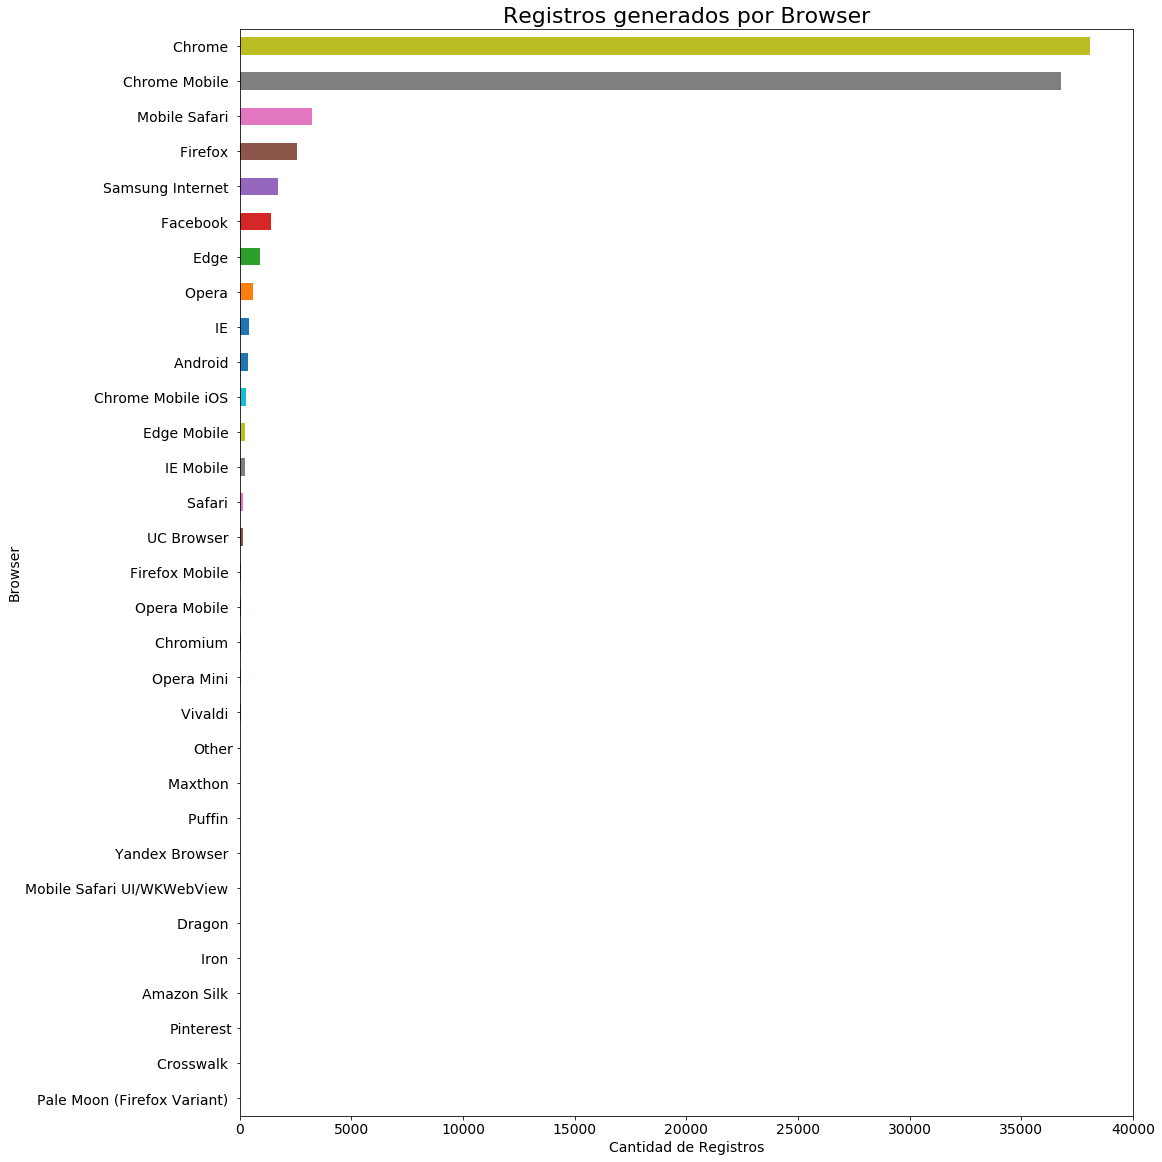

In [14]:
#Veamos en que exploradores la gente entra en el sitio

events['exploradores'] = events['browser_version'].str.replace('\d+', '').str.replace('.', '')
df_browser = events.groupby('exploradores')['timestamp'].count().sort_values()
ax = df_browser.plot(figsize=(16, 20), fontsize=14, kind='barh')
ax.set_title("Registros generados por Browser", fontsize=22)
ax.set_xlabel("Cantidad de Registros",  fontsize=14)
ax.set_ylabel("Browser",fontsize=14)



Text(0.5,0,'Cantidad Registros')

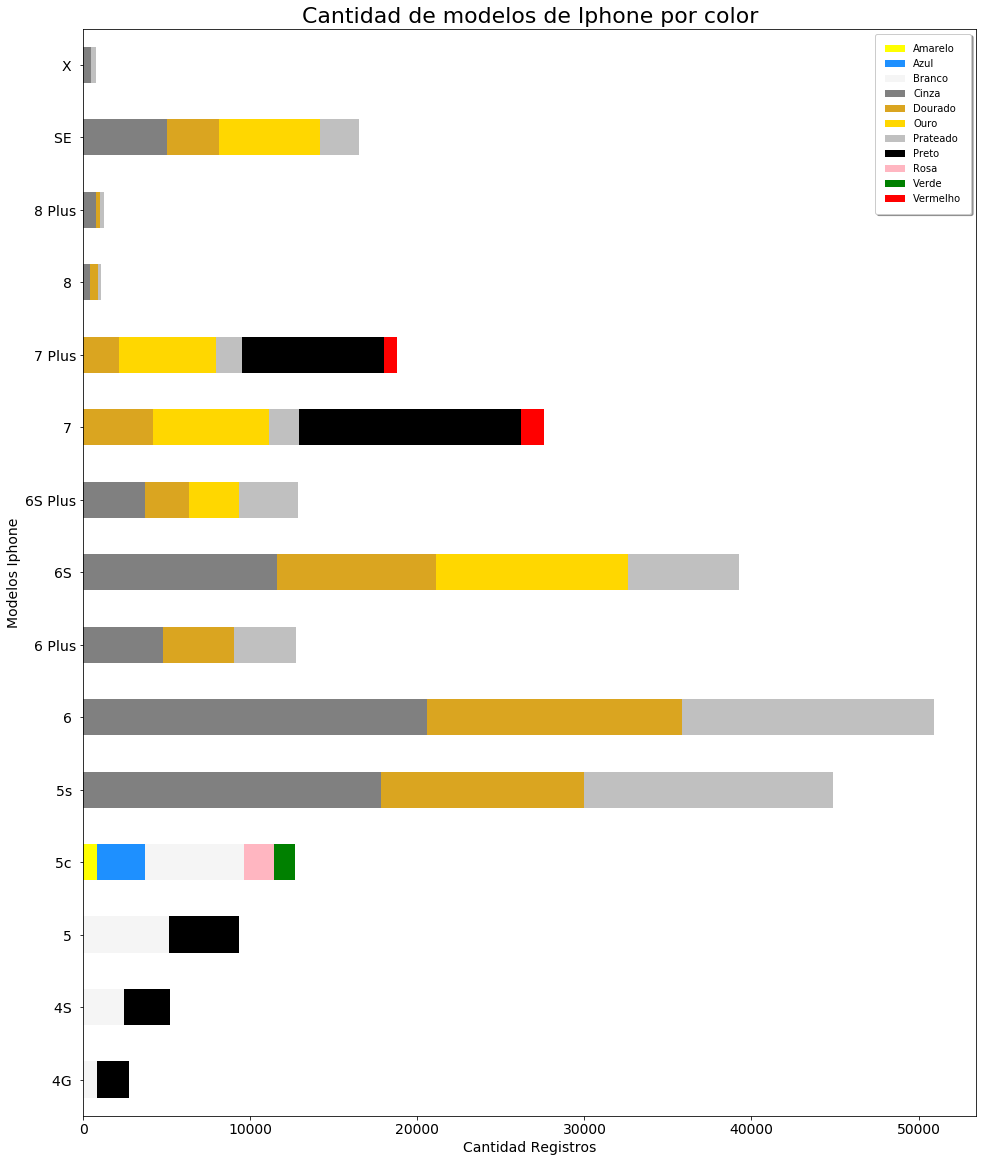

In [84]:
#Colores por marca

import matplotlib.patches as mpatches

events['color_unico'] = events.color.str.split(' ').str[0]
df_iphone = events.loc[events.marca == "iPhone",] 

df_modelo = df_iphone.groupby(['modelo','color_unico'])['timestamp'].count().unstack('color_unico').sort_index(axis=1, ascending=True)
ax = df_modelo.plot(figsize=(16, 20), fontsize=14, kind='barh', stacked=True,
                    color=['yellow','#1E90FF','#F5F5F5','#808080','#DAA520','#FFD700','#C0C0C0','#000000','#FFB6C1','#008000','#FF0000'])
ax.set_title("Cantidad de modelos de Iphone por color", fontsize=22)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set_ylabel("Modelos Iphone",  fontsize=14)
ax.set_xlabel("Cantidad Registros",fontsize=14)


#df_modelo.head()

In [77]:
#Empezamos a analizar un poco mas el set de datos
#Empezamos por las busquedas por skus

df_searc  = events.loc[events['event'] == 'searched products',['person','skus','timestamp']]
df_searc = df_searc.drop_duplicates(subset='person', keep="last")

df = df_searc['skus'].str.split(',').apply(pd.Series, 1).stack()
df.index = df.index.droplevel(-1)
df.name = 'sku'
df.head()




159     2692
159     6819
159      823
159     2779
159    13864
Name: sku, dtype: object

In [79]:
#Agrupamos por sku de equipos

events['marca'] = events['model'].str.split(' ').str[0]
events['modelo'] = events['model'].str.split(' ').str[1].fillna('') + ' ' + events['model'].str.split(' ').str[2].fillna('')

df_equipo = events.dropna(subset=['model'])
df_equipo = df_equipo.drop_duplicates(subset='sku', keep="last")

df_equipo = df_equipo.loc[:,['sku','model','marca','modelo','color']]

df_equipo.join(df)

df_equipo.head()

ValueError: columns overlap but no suffix specified: Index([u'sku'], dtype='object')

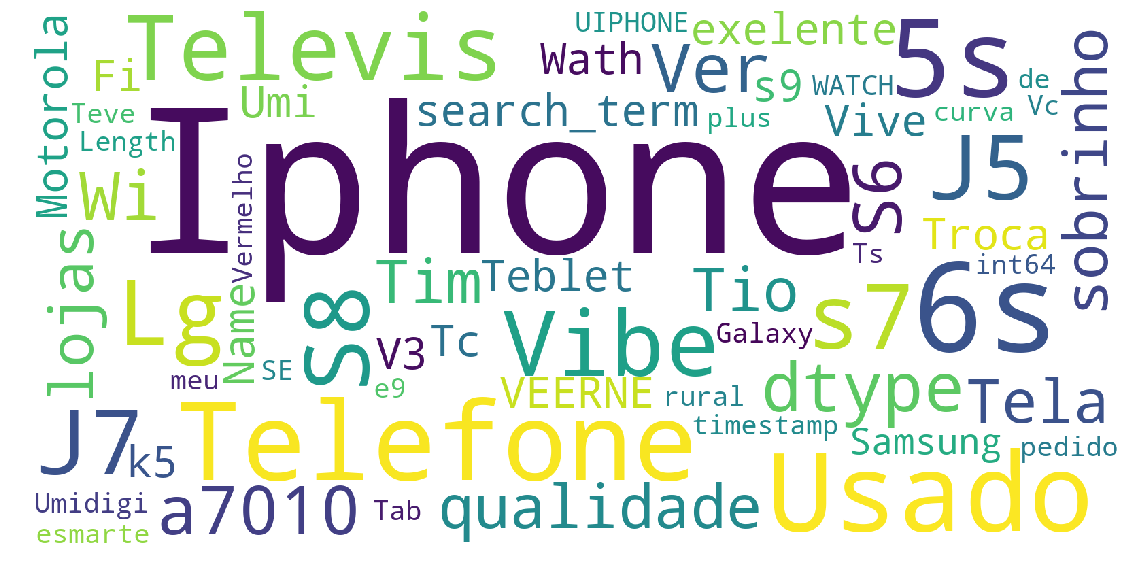

In [34]:
#Buscamos por las palabras mas comunnes por los usuario

df_search = events.loc[events.event == "searched products",]

df = df_search.groupby("search_term")["timestamp"].count().sort_values(ascending=False)

stopwords = set(STOPWORDS)

wordcloud= WordCloud(width=1600, height=800, background_color='white',stopwords=stopwords 
                       ,max_font_size=300,random_state=30).generate(str(df))

fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


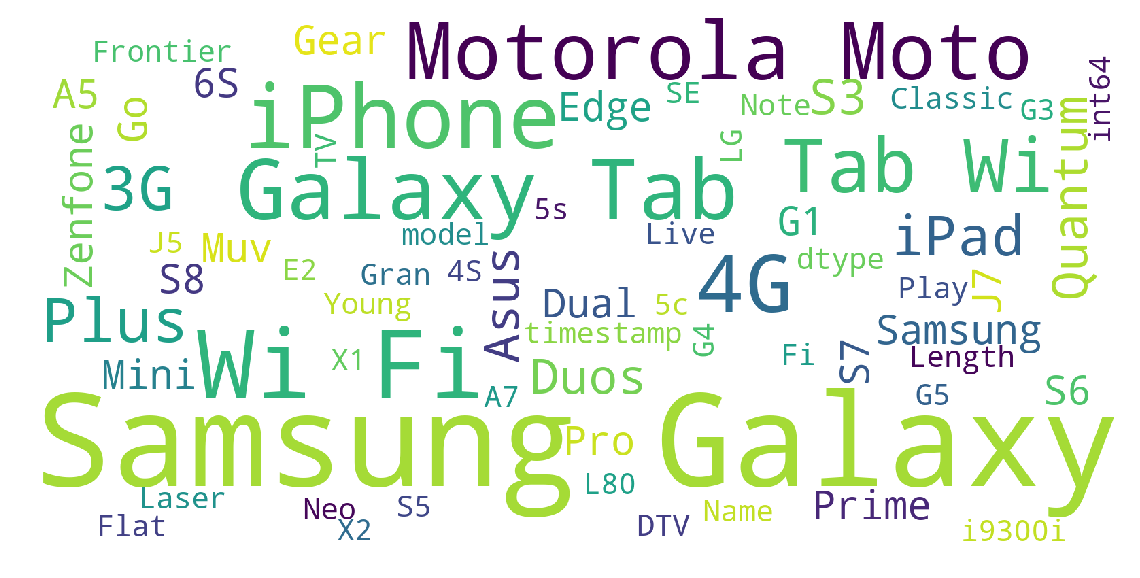

In [41]:
#Veamos las marcas mas vistas por los usuarios
df_search = events.loc[events.event == "viewed product",]

df = df_search.groupby("model")["timestamp"].count().sort_values(ascending=False)


stopwords = set(STOPWORDS)

wordcloud = WordCloud(width=1600, height=800, background_color='white',stopwords=stopwords,max_font_size=300,random_state=405599, margin=0).generate(str(df))

fig = plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Text(0.5,0,'Cantidad Registros')

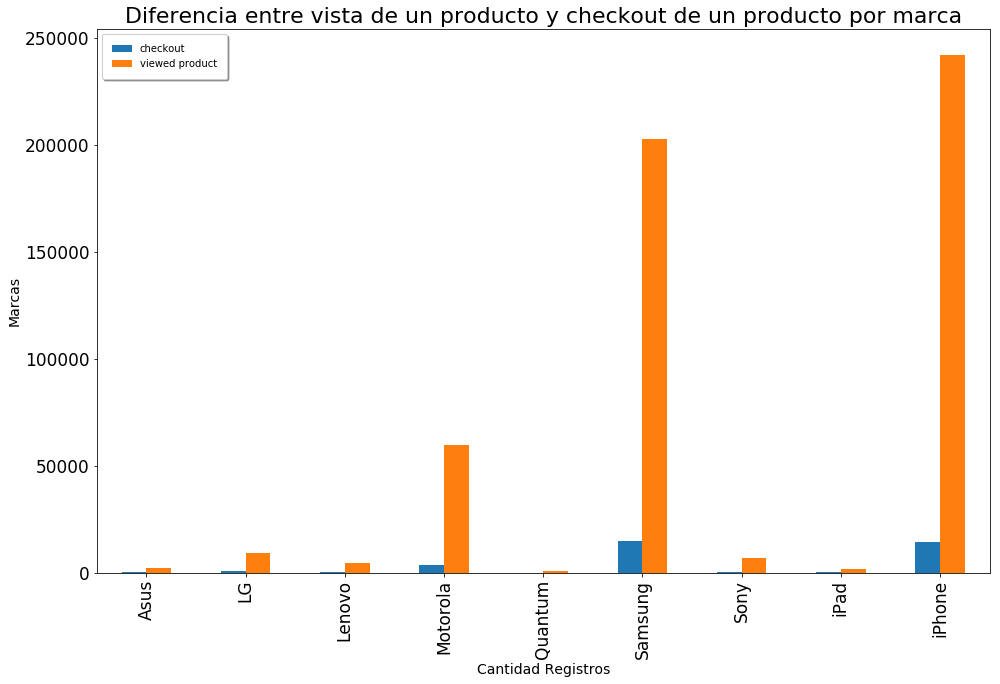

In [18]:
#Cantidad de visualizaciones de equipos vs Cantidad de checkouts hechos

df_checkout = events.loc[events.event == "checkout"]
df_viewed = events.loc[events.event == "viewed product"]

df = pd.concat([df_checkout, df_viewed])
df.head()

df_a = df.groupby(['marca','event'])["timestamp"].count().unstack()
ax = df_a.plot(kind ='bar', figsize=(16, 10), fontsize=17)
ax.set_title("Diferencia entre vista de un producto y checkout de un producto por marca", fontsize=22)
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.set_ylabel("Marcas",  fontsize=14)
ax.set_xlabel("Cantidad Registros",fontsize=14)

#df_viewed["marca"].value_counts()